# Practice 7.
Objectives:
Understand the Random Forests.
See the effects of changing the parameters of the tree.
Aplication:
Data base: Datasets for "The Elements of Statistical Learning" (https://web.stanford.edu/~hastie/ElemStatLearn/data.html)

Database: coronary heart disease (CHD), https://web.stanford.edu/~hastie/ElemStatLearn/datasets/SAheart.data

Predict CHD (1 or 0)

In [1]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import  RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

## Let us load the database and   clean it up.

In [2]:
File = "SouthAfricanHeartDesease.csv"
Filename = os.path.join(os.getcwd(),'Data',File)
print(f'Filename with path: \n {Filename}')
Data = pd.read_csv(Filename)
Data.head().T

Filename with path: 
 C:\Users\raulc\Desktop\Master\Q2\ML\SeventhPractice\Data\SouthAfricanHeartDesease.csv


0       1        2        3        4
row.names        1       2        3        4        5
sbp            160     144      118      170      134
tobacco       12.0    0.01     0.08      7.5     13.6
ldl           5.73    4.41     3.48     6.41      3.5
adiposity    23.11   28.61    32.28    38.03    27.78
famhist    Present  Absent  Present  Present  Present
typea           49      55       52       51       60
obesity       25.3   28.87    29.14    31.99    25.99
alcohol       97.2    2.06     3.81    24.26    57.34
age             52      63       46       58       49
chd              1       1        0        1        1

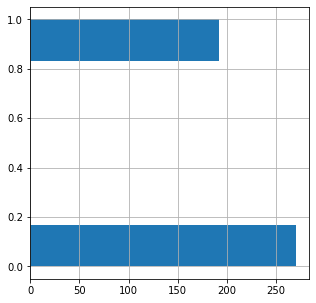

In [3]:
Coding_famhist ={'Present':1,'Absent':0}
Data['famhist'] = Data['famhist'].map(Coding_famhist)
ax =Data['famhist'].hist(figsize= (5,5),orientation="horizontal",bins = 6)

Data.drop(columns = ['row.names'],inplace = True)

##  First we partition database into train and test
### Note the helper function

In [4]:
def PartitionOfDatabase(Data,Fraction = 0.75):
    NumSamples, NumFeatures = Data.shape
    Index = list(range(NumSamples))
    RandomIndex = np.random.permutation(Index)
    NumTrainElements = int(Fraction*NumSamples)
    TrainIndex = RandomIndex[:NumTrainElements]
    TestIndex = RandomIndex[NumTrainElements:]
    TrainDB = Data.iloc[TrainIndex]
    TestDB = Data.iloc[TestIndex]
    return TrainDB,TestDB


In [5]:
TrainDB,TestDB = PartitionOfDatabase(Data,Fraction = 0.75)
y = TrainDB['chd']
InputFeatures = [fea for fea in TrainDB.columns if  fea != 'chd']
print(f' Input variables: \n {InputFeatures}')
print('_'*50)
X = TrainDB[InputFeatures]

 Input variables: 
 ['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age']
__________________________________________________


##  Now we create the object Random Forest and fit it

In [6]:
clf = RandomForestClassifier(n_estimators=1000, max_features='sqrt', oob_score=True,n_jobs=4)
clf.fit(X, y)

RandomForestClassifier(max_features='sqrt', n_estimators=1000, n_jobs=4,
                       oob_score=True)

### The Out of Bag estimate should give something similar to the test value.

In [7]:
oob_error = 1 - clf.oob_score_
print(f'Out of Bag estimate of the error:{oob_error*100:2.2f} %')

Out of Bag estimate of the error:28.61 %


Subtracting the OOB score from 1 gives you the complement of the score, which represents the error rate or misclassification rate on the out-of-bag samples. 

The Out-of-Bag (OOB) estimate is a method used in ensemble learning, particularly in Random Forests, to estimate the performance of the model without the need for a separate validation set. It is a way to evaluate the model's performance using the training data itself. It usually is pretty similar to test error.

In a Random Forest, each decision tree is trained on a bootstrap sample, which is created by randomly sampling the training data with replacement. This means that for each tree, some observations in the original dataset are not used during its construction. These unused observations are referred to as out-of-bag samples.

The advantage of the OOB estimate is that it provides a reliable estimate of the model's performance without the need for a separate validation set. It can be used to compare different parameter settings, assess the effect of feature selection, or even determine the optimal number of trees in the Random Forest.

## Let us see the importance of the variables

1. Gini Impurity:
The Gini impurity for a binary classification problem is given by:

$ Gini(p) = 1 - (p_0^2 + p_1^2) $

where $ p_0 $ is the probability of class 0 and $ p_1 $ is the probability of class 1.

2. Gini Importance Calculation:
To compute the Gini importance of a feature, follow these steps:

- Initialize the Gini importance of feature $ j $ as $ \text{GI}_j = 0$.

- For each tree $ t $ in the Random Forest:
  - Traverse each node $ n $ in the tree:
    - Let $ p_n $ be the class probabilities in node $ n $.
    - Compute the Gini impurity of the node, $ \text{Gini}(p_n) $.
    - Calculate the impurity decrease at node $ n $ resulting from splitting on feature $ j $ as
      $ \Delta \text{GI}_{n,j} = \text{Gini}(p_n) - (\text{Weighted_Gini_left} + \text{Weighted_Gini_right}) $,
      where $ \text{Weighted_Gini_left} $ and $ \text{Weighted_Gini_right} $ are the weighted Gini impurities of the left and right child nodes.
    - Add the impurity decrease $ \Delta \text{GI}_{n,j} $ to the Gini importance $ \text{GI}_j $.

- Normalize the feature importances:
  - Divide each $ \text{GI}_j $ by the sum of all $ \text{GI} $ values across features.


In [8]:
clf.feature_importances_

array([0.09825985, 0.16730339, 0.12917229, 0.10729938, 0.05063254,
       0.10555853, 0.10100283, 0.07670587, 0.16406532])

### We will use pandas to create a visualization

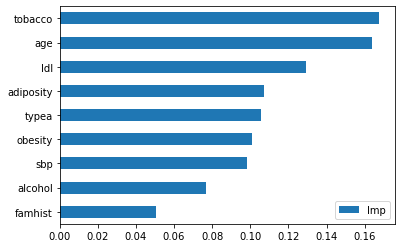

In [9]:
FeaImp=pd.DataFrame(data =clf.feature_importances_,index =  InputFeatures,columns = ['Imp'])
FeaImp.sort_values(by = ['Imp'],inplace = True)
ax = FeaImp.plot.barh()

In [10]:
## Remember the tree we created in the last practice

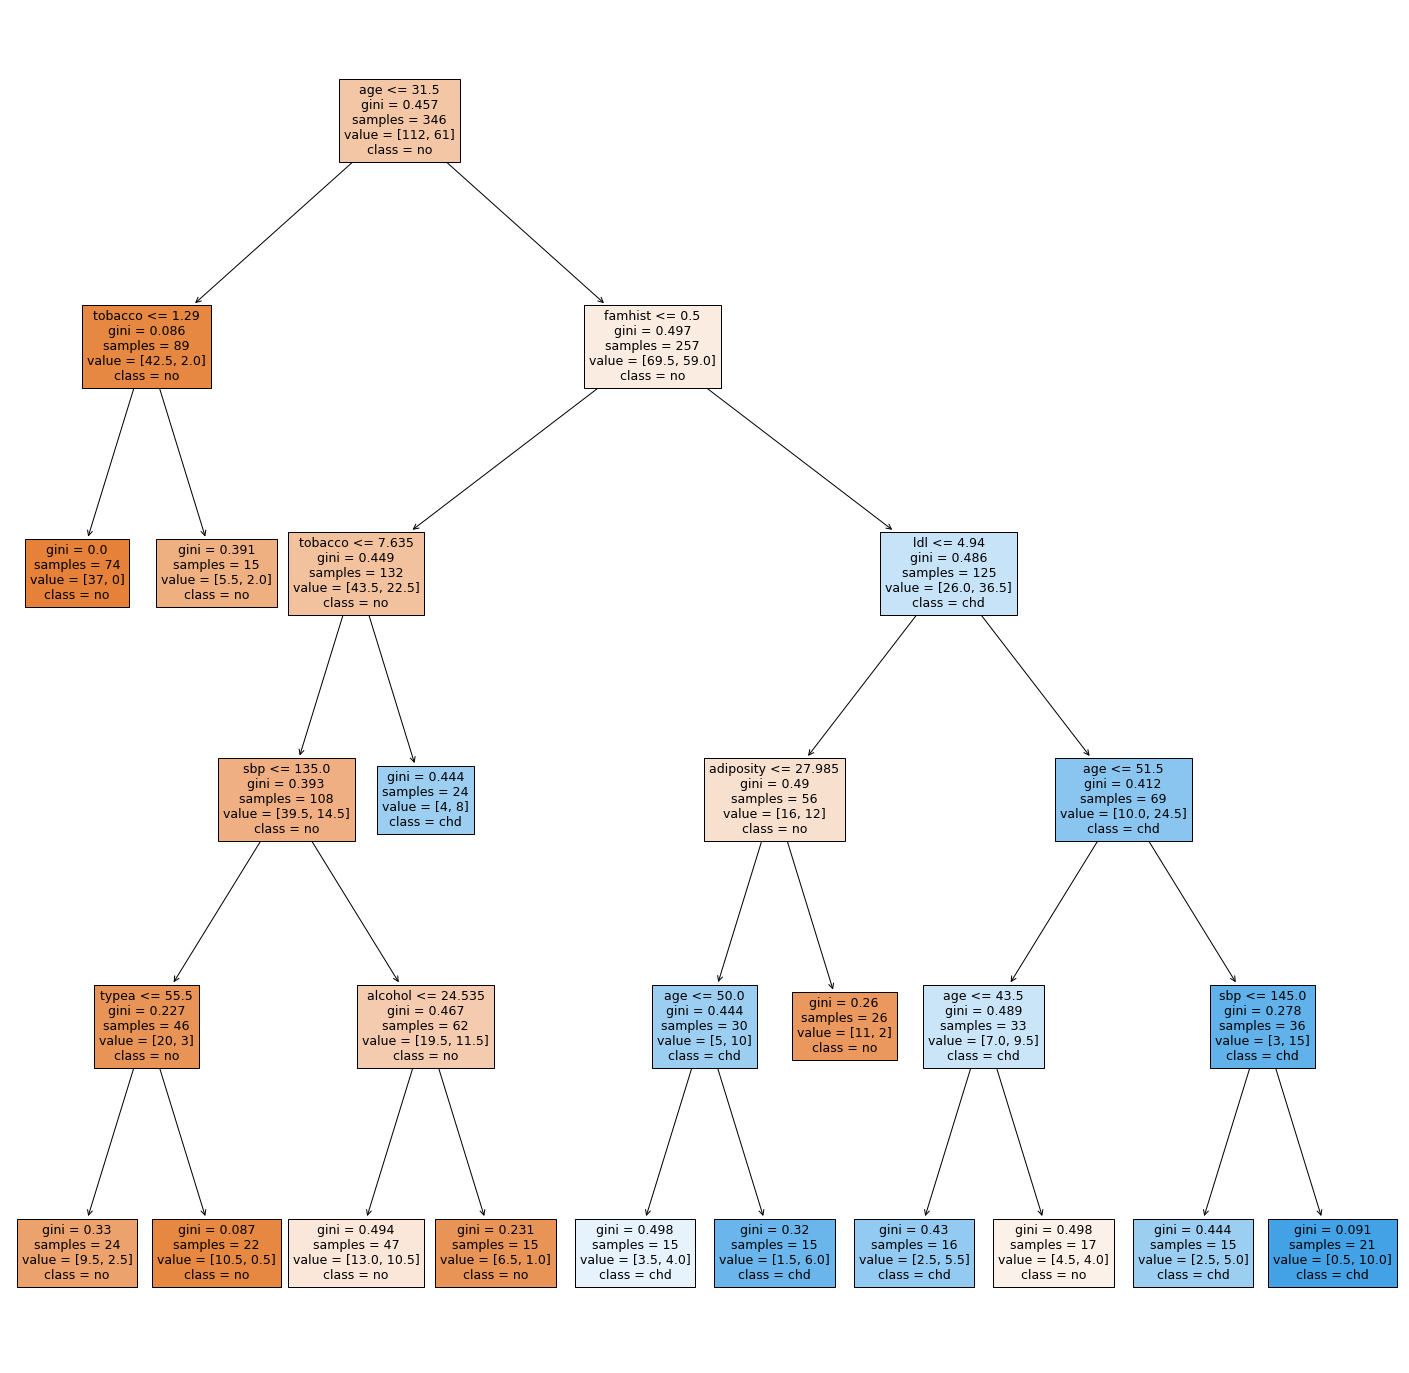

##  Performance on train
**Definition:**
$\texttt{accuracy}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples}-1} 1(\hat{y}_i = y_i)$


Accuracy (train)  100.0% 
[[227   0]
 [  0 119]]


C:\Users\raulc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


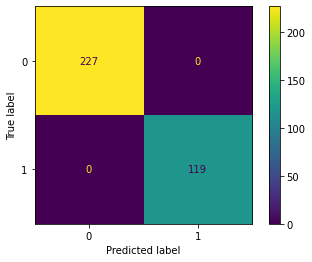

In [11]:
y_hat = clf.predict(X)
accuracy = accuracy_score(y, y_hat)
print("Accuracy (train)  %0.1f%% " % ( accuracy * 100))
print(confusion_matrix(y, y_hat))
plot_confusion_matrix(clf, X, y)  
plt.show()

## Remember for a single tree we had 
Accuracy (train)  78.6% 

[[195  29]

 [ 45  77]]

## Performance on test
### Note it is almost the same that the Out of Bag estimate.

Accuracy (test)  67.2% 
[[59 16]
 [22 19]]


C:\Users\raulc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


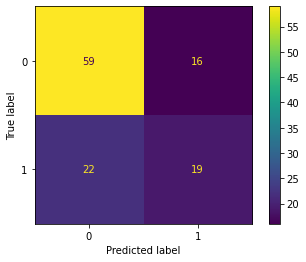

In [12]:
y_tst = TestDB['chd']
X_tst = TestDB[InputFeatures]
y_hat_tst = clf.predict(X_tst)
accuracy = accuracy_score(y_tst, y_hat_tst)
print("Accuracy (test)  %0.1f%% " % ( accuracy * 100))
print(confusion_matrix(y_tst, y_hat_tst))
plot_confusion_matrix(clf, X_tst, y_tst)  
plt.show()

## Better than the case of one only tree
Accuracy (test)  63.8% 

[[58 20]
 
 [22 16]]


### Homework: <font color='red'>   Plot the evolution of the Out of Bag error and the test error as a function of the number of trees.  For instance from 100 to 2000 in increments of 100.</font> 

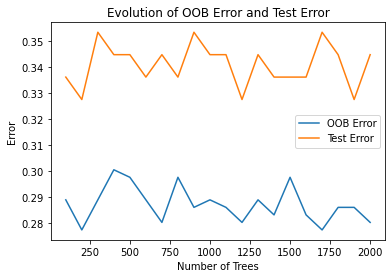

In [13]:
# Define the range of number of trees
num_trees = range(100, 2001, 100)

# Initialize lists to store the OOB error and test error
oob_errors = []
test_errors = []

# Iterate over the number of trees
for n in num_trees:
    # Initialize and train the Random Forest
    rf = RandomForestClassifier(n_estimators=n, max_features='sqrt', oob_score=True,n_jobs=4)
    rf.fit(X, y)
    
    # Calculate the OOB error
    oob_error = 1 - rf.oob_score_
    oob_errors.append(oob_error)
    
    # Make predictions on the test dataset
    y_pred = rf.predict(X_tst)
    
    # Calculate the test error
    test_error = 1 - accuracy_score(y_tst, y_pred)
    test_errors.append(test_error)

# Plot the OOB error and test error as a function of the number of trees
plt.plot(num_trees, oob_errors, label='OOB Error')
plt.plot(num_trees, test_errors, label='Test Error')
plt.xlabel('Number of Trees')
plt.ylabel('Error')
plt.title('Evolution of OOB Error and Test Error')
plt.legend()
plt.show()

### Homework: <font color='red'>    **Important**: we still have too many false negatives. Try  changing the class_weight = {0:0.5,1:0.5}.  </font>

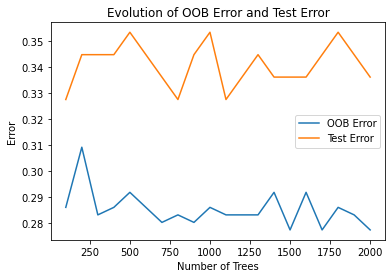

In [14]:
# Define the range of number of trees
num_trees = range(100, 2001, 100)

# Initialize lists to store the OOB error and test error
oob_errors = []
test_errors = []

# Iterate over the number of trees
for n in num_trees:
    # Initialize and train the Random Forest
    rf = RandomForestClassifier(n_estimators=n, max_features='sqrt', oob_score=True,n_jobs=4,class_weight={0: 0.5, 1: 0.5})
    rf.fit(X, y)
    
    # Calculate the OOB error
    oob_error = 1 - rf.oob_score_
    oob_errors.append(oob_error)
    
    # Make predictions on the test dataset
    y_pred = rf.predict(X_tst)
    
    # Calculate the test error
    test_error = 1 - accuracy_score(y_tst, y_pred)
    test_errors.append(test_error)

# Plot the OOB error and test error as a function of the number of trees
plt.plot(num_trees, oob_errors, label='OOB Error')
plt.plot(num_trees, test_errors, label='Test Error')
plt.xlabel('Number of Trees')
plt.ylabel('Error')
plt.title('Evolution of OOB Error and Test Error')
plt.legend()
plt.show()

# Explore another database. Data appliances database
### See practice 3.

### Homework: <font color='red'>    Rememeber it is a regression problem, therefore use the method RandomForestRegressor.  </font>

### Homework: <font color='red'>    Try to predict with random forest. Rememeber the histogram of  the target value, 'Appliances'. Do the experiment with threshold and without. How does $R^2(y, \hat{y})$ and RMSE change from the case of linear regression?, (note that one can improve and the other not). how does the plot y vs. $\hat{y} $ change? </font>

### Homework: <font color='red'>    Repeat the practice with this database and compare with the results of when using linear regressio.</font>
### Homework: <font color='red'>    Could you comment on the differences you find, i.e. difficulty in finding a good model, and performance.</font>

In [15]:
File = "energydata_complete.csv"
Filename = os.path.join(os.getcwd(),'Data',File)
print(f'Filename with path: \n {Filename}')
Data = pd.read_csv(Filename)
#Data.head().T

Filename with path: 
 C:\Users\raulc\Desktop\Master\Q2\ML\SeventhPractice\Data\energydata_complete.csv


## Next we will clean the database

In [16]:
#Threshold = 200
#Data = Data[Data['Appliances']<Threshold]
date_raw = pd.to_datetime(Data['date'])
date_raw.map(lambda x: x.day)
day_month = date_raw.map(lambda x: x.day)
day_week = date_raw.map(lambda x: x.dayofweek)
hour_day = date_raw.map(lambda x: x.hour)
Data['day_month'] = day_month
Data['day_week'] = day_week
Data['hour_day'] = hour_day
#Data['Appliances'] = np.log10(Data['Appliances'].values+1)
Data['Time from Midning'] = np.sqrt(np.power(np.sin(2*np.pi*hour_day/24.),2)+np.power(1.-np.cos(2*np.pi*hour_day/24.),2))
Data.drop(columns = ['date','rv1','rv2'],inplace = True)

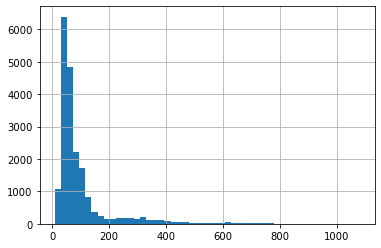

In [17]:
ax = Data['Appliances'].hist(bins = 50)
clf = None

In [18]:
Data.head()

Appliances  lights     T1       RH_1    T2       RH_2     T3       RH_3  \
0          60      30  19.89  47.596667  19.2  44.790000  19.79  44.730000   
1          60      30  19.89  46.693333  19.2  44.722500  19.79  44.790000   
2          50      30  19.89  46.300000  19.2  44.626667  19.79  44.933333   
3          50      40  19.89  46.066667  19.2  44.590000  19.79  45.000000   
4          60      40  19.89  46.333333  19.2  44.530000  19.79  45.000000   

          T4       RH_4  ...     T_out  Press_mm_hg  RH_out  Windspeed  \
0  19.000000  45.566667  ...  6.600000        733.5    92.0   7.000000   
1  19.000000  45.992500  ...  6.483333        733.6    92.0   6.666667   
2  18.926667  45.890000  ...  6.366667        733.7    92.0   6.333333   
3  18.890000  45.723333  ...  6.250000        733.8    92.0   6.000000   
4  18.890000  45.530000  ...  6.133333        733.9    92.0   5.666667   

   Visibility  Tdewpoint  day_month  day_week  hour_day  Time from Midning  
0   63.000000        5.3         11         0        17           1.586707  
1   59.166667        5.2         11         0        17           1.586707  
2   55.333333        5.1         11         0        17           1.586707  
3   51.500000        5.0         11         0        17           1.586707  
4   47.666667        4.9         11         0        17           1.586707  

[5 rows x 30 columns]

In [19]:
TrainDB,TestDB = PartitionOfDatabase(Data,Fraction = 0.75)
y = TrainDB['Appliances']
InputFeatures = [fea for fea in TrainDB.columns if  fea != 'Appliances']
print(f' Input variables: \n {InputFeatures}')
print('_'*50)
X = TrainDB[InputFeatures]
X_test = TestDB[InputFeatures]
y_test = TestDB['Appliances']

 Input variables: 
 ['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'day_month', 'day_week', 'hour_day', 'Time from Midning']
__________________________________________________


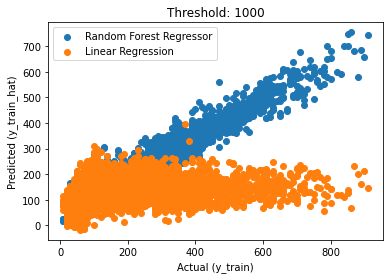

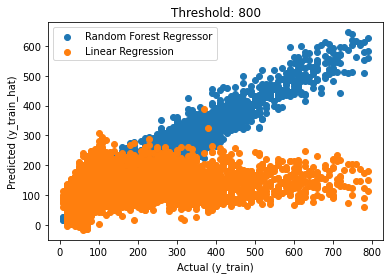

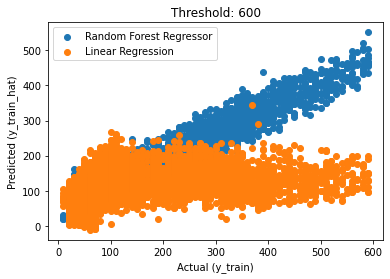

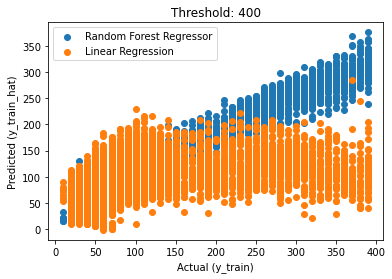

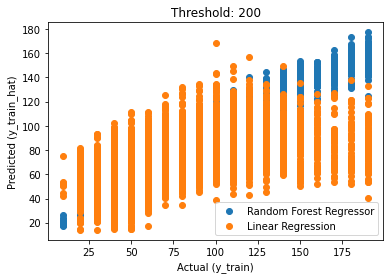

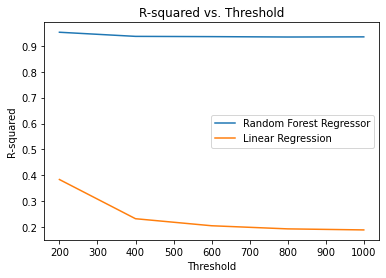

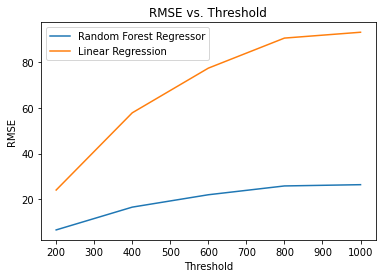

In [20]:
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression

# Define the list of thresholds
thresholds = [1000, 800, 600, 400, 200]

# Initialize lists to store the performance metrics
r2_rf_scores = []
rmse_rf_scores = []
r2_lr_scores = []
rmse_lr_scores = []

# Iterate over the thresholds
for threshold in thresholds:
    # Apply the threshold to the target variable. If we remove data points from y and y_test, we also need to remove the corresponding rows from X and X_test.
    if threshold is None:
        y_train_thresh = y
        y_test_thresh = y_test
        X_train_thresh = X
        X_test_thresh = X_test
    else:
        y_train_thresh = y[y<threshold]
        y_test_thresh = y_test[y_test<threshold]
        X_train_thresh = X[y < threshold]
        X_test_thresh = X_test[y_test < threshold]

    # Train a Random Forest Regressor without threshold
    rf = RandomForestRegressor()
    rf.fit(X_train_thresh, y_train_thresh)

    # Make predictions using Random Forest Regressor
    y_pred_rf = rf.predict(X_train_thresh)

    # Calculate R-squared and RMSE for Random Forest Regressor
    r2_rf = r2_score(y_train_thresh, y_pred_rf)
    rmse_rf = np.sqrt(mean_squared_error(y_train_thresh, y_pred_rf))

    # Train a Linear Regression model
    lr = LinearRegression()
    lr.fit(X_train_thresh, y_train_thresh)

    # Make predictions using Linear Regression
    y_pred_lr = lr.predict(X_train_thresh)

    # Calculate R-squared and RMSE for Linear Regression
    r2_lr = r2_score(y_train_thresh, y_pred_lr)
    rmse_lr = np.sqrt(mean_squared_error(y_train_thresh, y_pred_lr))

    # Append the scores to the lists
    r2_rf_scores.append(r2_rf)
    rmse_rf_scores.append(rmse_rf)
    r2_lr_scores.append(r2_lr)
    rmse_lr_scores.append(rmse_lr)
    
    # Plot y vs. y_hat for Random Forest Regressor and Linear Regression
    plt.scatter(y_train_thresh, y_pred_rf, label='Random Forest Regressor')
    plt.scatter(y_train_thresh, y_pred_lr, label='Linear Regression')
    plt.xlabel('Actual (y_train)')
    plt.ylabel('Predicted (y_train_hat)')
    plt.title(f'Threshold: {threshold}')
    plt.legend()
    plt.show()

# Plot R-squared scores for Random Forest Regressor and Linear Regression
plt.plot(thresholds, r2_rf_scores, label='Random Forest Regressor')
plt.plot(thresholds, r2_lr_scores, label='Linear Regression')
plt.xlabel('Threshold')
plt.ylabel('R-squared')
plt.title('R-squared vs. Threshold')
plt.legend()
plt.show()

# Plot RMSE scores for Random Forest Regressor and Linear Regression
plt.plot(thresholds, rmse_rf_scores, label='Random Forest Regressor')
plt.plot(thresholds, rmse_lr_scores, label='Linear Regression')
plt.xlabel('Threshold')
plt.ylabel('RMSE')
plt.title('RMSE vs. Threshold')
plt.legend()
plt.show()

Linear regression models assume a linear relationship between the features and the target variable. When outliers are present in the data, they can disproportionately influence the estimated coefficients and the overall model fit, disrupting the assumptions of linear models seen in the first part of the course. These outliers can lead to poorer performance in terms of $R^2$ and higher RMSE values. By applying a threshold and removing outliers, linear regression models become less affected by these extreme observations. Consequently, the model's performance in terms of $R^2$ can improve, and the RMSE can decrease, as the model is better able to capture the underlying linear relationship in the data.

On the other hand, random forest models are ensembles of decision trees and are inherently robust to outliers and non-linear relationships. They can handle complex interactions between features and the target variable without being strongly influenced by outliers. Random forest models divide the feature space into regions and make predictions based on the average (regression) or majority vote (classification) of the individual decision trees. Therefore, while applying a threshold can still have some impact on random forest performance, the effects on $R^2$ and RMSE tend to be less significant compared to linear regression. Random forest models can effectively capture non-linear relationships and handle outliers due to the ensemble nature of the model.

We do the same in the test data.

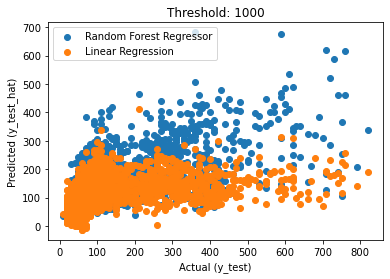

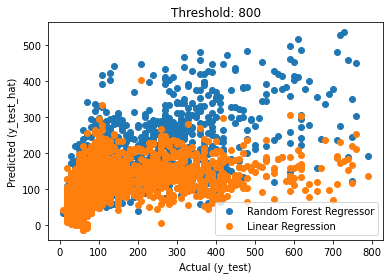

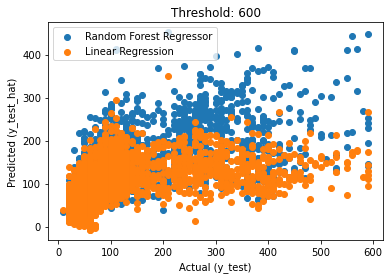

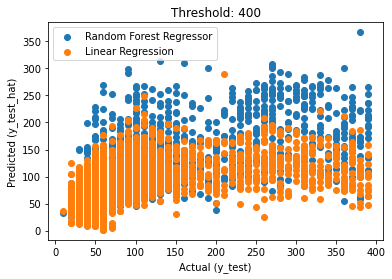

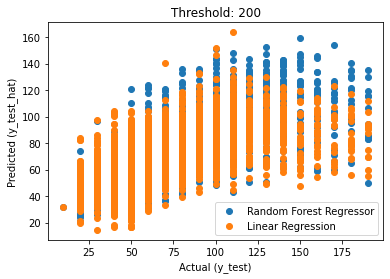

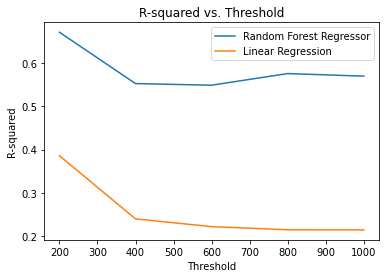

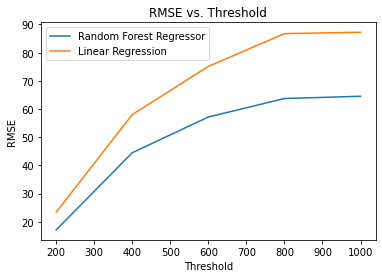

In [21]:
# Define the list of thresholds
thresholds = [1000, 800, 600, 400, 200]

# Initialize lists to store the performance metrics
r2_rf_scores = []
rmse_rf_scores = []
r2_lr_scores = []
rmse_lr_scores = []

# Iterate over the thresholds
for threshold in thresholds:
    # Apply the threshold to the target variable. If we remove data points from y and y_test, we also need to remove the corresponding rows from X and X_test.
    if threshold is None:
        y_train_thresh = y
        y_test_thresh = y_test
        X_train_thresh = X
        X_test_thresh = X_test
    else:
        y_train_thresh = y[y<threshold]
        y_test_thresh = y_test[y_test<threshold]
        X_train_thresh = X[y < threshold]
        X_test_thresh = X_test[y_test < threshold]

    # Train a Random Forest Regressor without threshold
    rf = RandomForestRegressor()
    rf.fit(X_train_thresh, y_train_thresh)

    # Make predictions using Random Forest Regressor
    y_pred_rf = rf.predict(X_test_thresh)

    # Calculate R-squared and RMSE for Random Forest Regressor
    r2_rf = r2_score(y_test_thresh, y_pred_rf)
    rmse_rf = np.sqrt(mean_squared_error(y_test_thresh, y_pred_rf))

    # Train a Linear Regression model
    lr = LinearRegression()
    lr.fit(X_train_thresh, y_train_thresh)

    # Make predictions using Linear Regression
    y_pred_lr = lr.predict(X_test_thresh)

    # Calculate R-squared and RMSE for Linear Regression
    r2_lr = r2_score(y_test_thresh, y_pred_lr)
    rmse_lr = np.sqrt(mean_squared_error(y_test_thresh, y_pred_lr))

    # Append the scores to the lists
    r2_rf_scores.append(r2_rf)
    rmse_rf_scores.append(rmse_rf)
    r2_lr_scores.append(r2_lr)
    rmse_lr_scores.append(rmse_lr)
    
    # Plot y vs. y_hat for Random Forest Regressor and Linear Regression
    plt.scatter(y_test_thresh, y_pred_rf, label='Random Forest Regressor')
    plt.scatter(y_test_thresh, y_pred_lr, label='Linear Regression')
    plt.xlabel('Actual (y_test)')
    plt.ylabel('Predicted (y_test_hat)')
    plt.title(f'Threshold: {threshold}')
    plt.legend()
    plt.show()

# Plot R-squared scores for Random Forest Regressor and Linear Regression
plt.plot(thresholds, r2_rf_scores, label='Random Forest Regressor')
plt.plot(thresholds, r2_lr_scores, label='Linear Regression')
plt.xlabel('Threshold')
plt.ylabel('R-squared')
plt.title('R-squared vs. Threshold')
plt.legend()
plt.show()

# Plot RMSE scores for Random Forest Regressor and Linear Regression
plt.plot(thresholds, rmse_rf_scores, label='Random Forest Regressor')
plt.plot(thresholds, rmse_lr_scores, label='Linear Regression')
plt.xlabel('Threshold')
plt.ylabel('RMSE')
plt.title('RMSE vs. Threshold')
plt.legend()
plt.show()

By applying the threshold, not only are outliers removed, but the distribution of the target variable becomes more Gaussian. This can have additional benefits in terms of model performance.

Linear Regression models assume that the target variable follows a Gaussian distribution. When the target variable deviates significantly from a Gaussian distribution, the model's assumptions may be violated, leading to poorer performance. By applying a threshold and transforming the target variable to be more Gaussian, you are aligning it closer to the assumptions of the Linear Regression model.

Random Forest models, on the other hand, are generally less sensitive to the distributional assumptions of the target variable. They are capable of capturing complex relationships between features and the target variable, even when the target variable deviates from a Gaussian distribution. However, in cases where the target variable is transformed to be more Gaussian, it can still benefit the Random Forest model by providing a more balanced and interpretable representation of the target variable.

### Homework: <font color='red'>    Explore the features that the random forest allows, such as controlling the number of elements by leaf, etc. See  web page https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_ </font>

### Homework: <font color='red'>    Consider predict the output in logarithmic scale (use base 10 for interpretation purposes) . What information are you getting with the appliances in log scale? Hint look at the histogram.</font>

When predicting the output in logarithmic scale (using base 10), you are essentially transforming the target variable (appliances) into a logarithmic form. This transformation can provide some useful information and insights:

-    Magnitude comparison: Taking the logarithm of the appliances' output allows you to compare the values on a relative scale rather than an absolute scale. For example, if one prediction is 10 and another is 100, the logarithmic transformation reveals that the difference in magnitude is 1 vs. 2 on a logarithmic scale. It does also help with outlier handling.The long right tail suggests the presence of extreme values or outliers in the data. By having a normal-shaped distribution, you can use statistical techniques that are based on assumptions of normality, such as calculating z-scores or conducting hypothesis tests

-    Compression of large values: If the appliances' output has a wide range of values, using a logarithmic scale can compress the scale and make it more manageable for interpretation. It can help in visualizing and understanding the data better.

-    Relationship interpretation: In the logarithmic scale, the distance between two values corresponds to the ratio of their original values. This means that changes in the logarithmic predictions can provide insights into the relative changes in the original appliance values. For example, a change of 1 in the logarithmic prediction corresponds to a 10-fold change in the original appliance value.

-    Skewed data handling: If the distribution of the appliances' output is highly skewed, the logarithmic transformation can help make it more symmetric and reduce the influence of extreme values. This can be beneficial when working with models that assume a more Gaussian distribution.

---
## Exploring Random Forest Classifier in scikit-learn

The `RandomForestClassifier` class in scikit-learn provides various options and parameters to control the behavior of the random forest model. Some of the important features and parameters you can explore include:

- `n_estimators`: This parameter controls the number of trees in the random forest. Increasing the number of trees can lead to better performance, but it also increases the computational cost.
- `max_depth`: This parameter sets the maximum depth of each decision tree in the random forest. It can be used to control the complexity of the trees and prevent overfitting. A lower value restricts the depth of the trees.
- `min_samples_split`: This parameter specifies the minimum number of samples required to split an internal node. It can be used to control the tree's depth and generalization ability. Increasing this value can prevent overfitting.
- `min_samples_leaf`: This parameter sets the minimum number of samples required to be at a leaf node. It can be used to control the number of elements in each leaf and prevent overfitting. Increasing this value can lead to more generalization.
- `max_features`: This parameter determines the number of features to consider when looking for the best split at each node. It can be set as a fixed value or a fraction of the total features. Limiting the number of features can improve the model's speed and reduce overfitting.
- `class_weight`: This parameter allows you to assign different weights to different classes in the target variable. It can be useful when dealing with imbalanced datasets, where certain classes are underrepresented.

To calculate feature importances, you can use the `feature_importances_` attribute of the trained random forest model. This attribute provides a measure of the importance of each feature in the model. The importance is calculated based on how much the feature contributes to reducing the impurity (e.g., Gini impurity) in the tree nodes. It is explained mathematically in the first stages of the practice.



### Homework: <font color='red'>    Compare the ranking of variables given by the random forest with the size of the weights of the linear regression. Explain  why the colinearity does not affect the performance in this case.</font>

In [22]:
# Apply logarithmic scale to the appliances variable
y_log = np.log10(y)

# Create and train the Random Forest model
rf = RandomForestRegressor()
rf.fit(X, y_log)

# Get feature importances from the Random Forest model
feature_importances_rf = rf.feature_importances_

# Create and train the Linear Regression model
lr = LinearRegression()
lr.fit(X, y_log)

# Get coefficients from the Linear Regression model
coefficients_lr = lr.coef_

In [23]:
# Sort the feature importances and coefficients in descending order
sorted_indices_rf = np.argsort(feature_importances_rf)[::-1]
sorted_indices_lr = np.argsort(coefficients_lr)[::-1]

# Get the column names from X dataset
column_names = X.columns

# Print variable rankings from Random Forest
print("Random Forest Variable Rankings:")
for i, index in enumerate(sorted_indices_rf):
    importance = feature_importances_rf[index]
    variable_name = column_names[index]
    print(f"Variable {variable_name}: Importance = {importance}")

# Print variable rankings from Linear Regression
print("Linear Regression Variable Rankings:")
for i, index in enumerate(sorted_indices_lr):
    coefficient = coefficients_lr[index]
    variable_name = column_names[index]
    print(f"Variable {variable_name}: Coefficient = {coefficient}")

Random Forest Variable Rankings:
Variable hour_day: Importance = 0.1924558935851279
Variable Time from Midning: Importance = 0.06655551582521094
Variable T8: Importance = 0.05302932891173898
Variable T3: Importance = 0.04542543632255188
Variable Press_mm_hg: Importance = 0.03953556252242508
Variable RH_3: Importance = 0.03829294006729327
Variable lights: Importance = 0.0382662381822428
Variable T9: Importance = 0.03650146571917304
Variable RH_5: Importance = 0.0321452552398982
Variable RH_2: Importance = 0.03033919528062252
Variable RH_9: Importance = 0.028542412934619253
Variable RH_7: Importance = 0.028072828348076357
Variable Tdewpoint: Importance = 0.02734988525566643
Variable RH_1: Importance = 0.025700126133105884
Variable RH_8: Importance = 0.025455612046577928
Variable RH_6: Importance = 0.025082463399740934
Variable T2: Importance = 0.02473948596348622
Variable T4: Importance = 0.023773371078169264
Variable RH_out: Importance = 0.023683849047148736
Variable RH_4: Importance = 

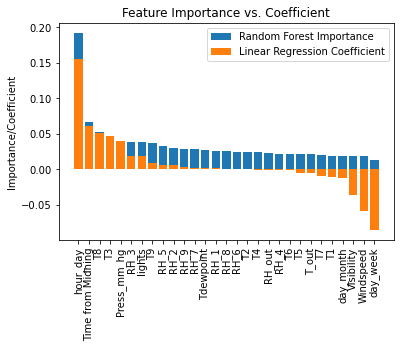

In [24]:
# Plot feature importances from Random Forest
plt.bar(range(len(sorted_indices_rf)), feature_importances_rf[sorted_indices_rf], label='Random Forest Importance')

# Plot coefficients from Linear Regression
plt.bar(range(len(sorted_indices_lr)), coefficients_lr[sorted_indices_lr], label='Linear Regression Coefficient')

# Set x-axis ticks and labels
plt.xticks(range(len(sorted_indices_rf)), [column_names[i] for i in sorted_indices_rf], rotation=90)

# Set the y-axis label
plt.ylabel('Importance/Coefficient')

# Set the plot title
plt.title('Feature Importance vs. Coefficient')

# Add a legend
plt.legend()

# Display the plot
plt.show()

When the assumptions of linear regression, such as linearity, independence of predictors, and normality of residuals, are satisfied, the importance rankings of the random forest align well with the coefficients of linear regression. By applying the logarithmic transformation to the target variable, you ensure that the linear regression assumptions hold more closely.

The logarithmic transformation helps address potential violations of linearity and skewed distributions in the target variable. It compresses larger values and spreads out smaller values, providing a more balanced and symmetric distribution. This transformation helps the linear regression model capture the relationships between predictors and the transformed target variable more effectively.

On the other hand, random forest is robust to collinearity and nonlinearities in the data. It can capture complex interactions and non-linear effects without relying on strict assumptions. Therefore, when the linear regression assumptions are met through the logarithmic transformation, the random forest importance rankings align well with the coefficients of linear regression because every method is capturing feature importance properly.

### Homework: <font color='red'>    Try to solve the problem with a single decision tree. Which rule can you get. (use from sklearn.tree import DecisionTreeRegressor)</font>

In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.tree import plot_tree

# Create a Decision Tree Regressor
tree = DecisionTreeRegressor()

# Fit the model on the training data
tree.fit(X, y)

# Predict on the test data
y_pred = tree.predict(X_test)

# Print the textual representation of the decision tree rules
tree_rules = export_text(tree, feature_names=X.columns.tolist())
print(tree_rules)

|--- hour_day <= 7.50
|   |--- Time from Midning <= 1.50
|   |   |--- T5 <= 18.99
|   |   |   |--- lights <= 5.00
|   |   |   |   |--- T8 <= 21.18
|   |   |   |   |   |--- RH_6 <= 43.61
|   |   |   |   |   |   |--- value: [130.00]
|   |   |   |   |   |--- RH_6 >  43.61
|   |   |   |   |   |   |--- T8 <= 19.17
|   |   |   |   |   |   |   |--- RH_9 <= 49.68
|   |   |   |   |   |   |   |   |--- RH_9 <= 49.58
|   |   |   |   |   |   |   |   |   |--- RH_out <= 99.42
|   |   |   |   |   |   |   |   |   |   |--- RH_6 <= 83.55
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- RH_6 >  83.55
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 19
|   |   |   |   |   |   |   |   |   |--- RH_out >  99.42
|   |   |   |   |   |   |   |   |   |   |--- RH_out <= 99.92
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- RH_out >  99.92
|   |

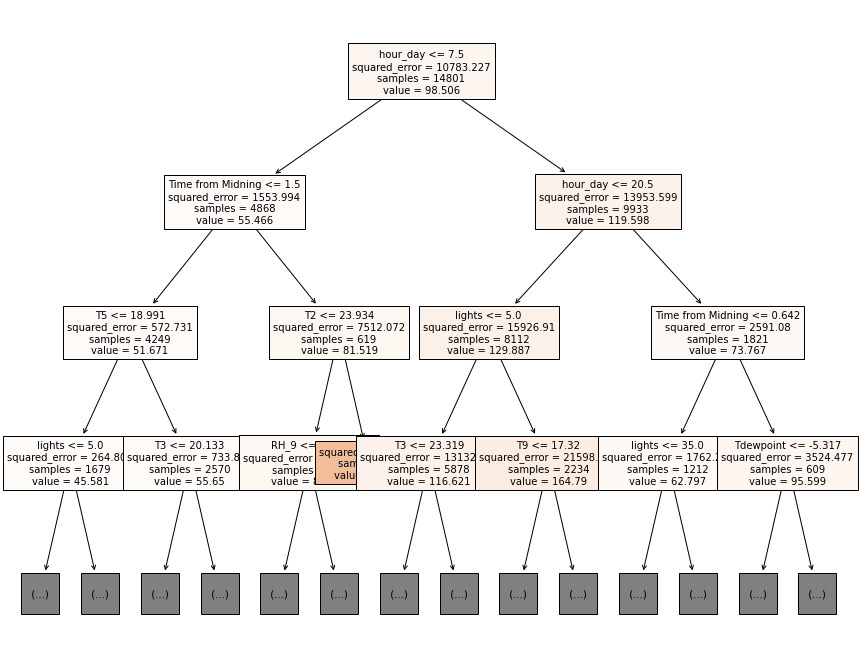

In [28]:
# Visualize the decision tree
plt.figure(figsize=(15, 12))
plot_tree(tree, feature_names=X.columns, filled=True, max_depth=3, fontsize=10)
plt.show()

The textual representation of the decision tree rules can appear schematic and concise, providing a summary of the conditions and splits made at each node. The rules typically follow a hierarchical structure, where each rule represents a specific condition that guides the tree's decision-making process.